# EOFs  analysis in CNRM-CM6-1 PPE
Here we want to read the global annual mean of the radiative budget and air surface temperature in the amip and amip-futre4K PPE. We then compute the global feedbacks over the five years simulated, and carry out an EOF analysis in oder to identify the leading patterns of feedback response. The input of this EOF analysis consists of the feedbacks anomaly matrix (N members x lat/lon position). 

# Importe modules

In [52]:
# Computational modules 
%matplotlib inline
import xarray as xr
import glob
import os
import numpy as np
import netCDF4
from netCDF4 import Dataset
import pandas as pd
import re
from array import array
from pylab import *
#import geopandas
from eofs.xarray import Eof
from eofs.multivariate.standard import MultivariateEof

# Plotting modules 
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas.plotting
import matplotlib.ticker as ticker
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import BoundaryNorm

# Functions definition

In [53]:
import sys
sys.path.append('/data/home/globc/peatier/CNRMppe')
import Fonctions
from Fonctions import get_wavg_budget_df
from Fonctions import wavg 
from Fonctions import plotlines_Xdf
from Fonctions import plotlines_1df
from Fonctions import Deltas_Lambda
from Fonctions import get_3D_budget_xarr
from Fonctions import get_3D_xarr
#from Fonctions import get_3D_SW_xarr
from Fonctions import get_3D_rsut_xarr
from Fonctions import get_3D_LW_xarr
from Fonctions import get_3D_tas_xarr
#from Fonctions import get_3D_pr_xarr

In [68]:
def get_3D_pr_xarr(path, filename, variables):

    # First step : download the data into dataframe
    file = xr.open_mfdataset(path+filename,combine='by_coords')
    #
    # Second step : compute the annual average 
    df = file[variables].mean('time', keep_attrs=True)
    pr = df['pr']*86400 
    #
    return pr

In [69]:
def get_3D_SW_xarr(path, filename, variables):

    # First step : download the data into dataframe
    file = xr.open_mfdataset(path+filename,combine='by_coords')
    
    # Second step : compute the annual average 
    df = file[variables].mean('time', keep_attrs=True)
    SW = df['rsdt'] - df['rsut']
    
    return SW

# Read files : radiative budget, tas

In [70]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/'
variables = ['pr']
variable = 'pr'

In [71]:
path = path_official
filename = '*_CNRM-CM6-1_amip_*.nc'
official_amip = get_3D_pr_xarr(path, filename, variables)

path = path_PPE+'ENSEMBLE1/CNRM-CM6-1_amip_PPE/CNRM-CM6-1_amip_r1i1p1f2/'
filename = '*_CNRM-CM6-1_amip_*.nc'
p1_amip = get_3D_pr_xarr(path, filename, variables)

In [72]:
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412',
                    'p414','p416',
                    'p413','p419','p424','p426','p428','p421','p423',
                    'p425','p427','p429','p430','p436','p438','p431','p433',
                    'p442','p446','p443','p445','p447',
                    'p452','p454','p456','p458','p457','p459',
                    'p460','p465','p467','p469',
                    'p470','p471']

len(nb_p_list)

102

In [73]:
path_official='/data/scratch/globc/peatier/CMIP6/CNRM-CM6-1/CFMIP/amip/'
path_PPE='/data/scratch/globc/peatier/CNRM-CM6-1_PPE/ENSEMBLE2/'
filename='*_amip_*.nc'

# List, à changer en fonction de ce que l'on veut regarder :
nb_p_list = ['p311', 'p312', 'p314', 'p316',
                    'p317', 'p319', 'p320', 'p321', 'p322', 'p324', 'p325', 'p326', 
                    'p329', 'p330', 'p331', 'p332', 'p335', 'p336', 'p337' ,'p338', 
                    'p340', 'p341', 'p343', 'p344', 'p346', 'p347', 'p348', 'p349', 
                    'p350', 'p353', 'p355', 'p357', 'p359', 'p360', 
                    'p361', 'p363', 'p365', 'p367', 'p368', 'p369', 
                    'p372', 'p373', 'p374', 'p375', 'p376', 'p378', 'p381', 'p382', 
                    'p384', 'p386', 'p388', 'p389', 'p391', 'p392', 'p393', 
                    'p394', 'p395', 'p396', 'p398', 'p399', 'p400', 'p404', 
                    'p406', 'p407', 'p409', 'p410', 'p411', 'p412',
                    'p414','p416',
                    'p413','p419','p424','p426','p428','p421','p423',
                    'p425','p427','p429','p430','p436','p438','p431','p433',
                    'p442','p446','p443','p445','p447',
                    'p452','p454','p456','p458','p457','p459',
                    'p460','p465','p467','p469',
                    'p470','p471']


N=len(nb_p_list)
amip={}
i = 0
while i<N:
    nb_p = nb_p_list[i]
    print(nb_p)
    path=path_PPE+'CNRM-CM6-1_amip_LHS500_PPE/CNRM-CM6-1_amip_r1i1'+str(nb_p)+'f2/'
    amip[str(nb_p)] = get_3D_pr_xarr(path, filename, variables)
    i=i+1             

p311
p312
p314
p316
p317
p319
p320
p321
p322
p324
p325
p326
p329
p330
p331
p332
p335
p336
p337
p338
p340
p341
p343
p344
p346
p347
p348
p349
p350
p353
p355
p357
p359
p360
p361
p363
p365
p367
p368
p369
p372
p373
p374
p375
p376
p378
p381
p382
p384
p386
p388
p389
p391
p392
p393
p394
p395
p396
p398
p399
p400
p404
p406
p407
p409
p410
p411
p412
p414
p416
p413
p419
p424
p426
p428
p421
p423
p425
p427
p429
p430
p436
p438
p431
p433
p442
p446
p443
p445
p447
p452
p454
p456
p458
p457
p459
p460
p465
p467
p469
p470
p471


In [74]:
amip['official'] = official_amip
amip['p1'] = p1_amip

# Create EOF input matrix

In [75]:
n=len(nb_p_list)
amip_list=[0]*(n+2)

amip_list[0] = amip['official']
amip_list[1] = amip['p1']

i = 0
while i<n:
    nb_p = nb_p_list[i]
    #print(nb_p)
    tmp = amip[str(nb_p)]
    #j=i+1
    amip_list[i+2] = tmp
    i+=1

In [76]:
matrix = xr.combine_nested(amip_list, concat_dim=['time'])
matrix

<xarray.DataArray 'pr' (time: 104, lat: 128, lon: 256)>
dask.array<concatenate, shape=(104, 128, 256), dtype=float64, chunksize=(1, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
Dimensions without coordinates: time

# EOF analysis (tas)

In [77]:
# Pondérer par cosinus de latitude : 
lats = matrix['lat'][:]
coslat = np.cos(np.deg2rad(lats)).clip(0., 1.)
wgts = np.sqrt(coslat).drop(labels='height').values
W =wgts[np.newaxis,:,np.newaxis]
#W

In [78]:
# Compute anomalies by removing the time-mean.
mean = matrix.mean(axis=0)
anom = matrix - mean
anom

<xarray.DataArray 'pr' (time: 104, lat: 128, lon: 256)>
dask.array<sub, shape=(104, 128, 256), dtype=float64, chunksize=(1, 128, 256), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
Dimensions without coordinates: time

In [79]:
mean_df = mean.to_dataframe(name=str(variable)+'mean').drop(labels = 'height', axis=1)
mean_df

anom_df =  anom.to_dataframe(name=str(variables[0])+'mean').drop(labels = 'height', axis=1)
anom_df


# Save the numpy array in a file  
mean_df.to_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_'+str(variable)+'_mean.npy')
anom_df.to_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_'+str(variable)+'_anom.npy')

In [80]:
mean_df

prmean
lat        lon                
-88.927735 0.00000    0.161525
           1.40625    0.161525
           2.81250    0.161525
           4.21875    0.161525
           5.62500    0.161525
...                        ...
 88.927735 352.96875  0.553754
           354.37500  0.553754
           355.78125  0.553754
           357.18750  0.553754
           358.59375  0.553754

[32768 rows x 1 columns]

In [81]:
# Create an EOF solver to do the EOF analysis. 
solver = Eof(anom, weights=W)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SW feedbacks at each grid point, and the
# leading PC time series itself.
eof = solver.eofsAsCovariance(neofs=10, pcscaling=1)
pc = solver.pcs(pcscaling=1)

In [82]:
varFrac = solver.varianceFraction(neigs=10)
varFrac

<xarray.DataArray 'variance_fractions' (mode: 10)>
array([0.27980787, 0.17598569, 0.08496808, 0.0569807 , 0.04351184,
       0.03195069, 0.02559062, 0.02248726, 0.01874098, 0.01450242])
Coordinates:
  * mode     (mode) int64 0 1 2 3 4 5 6 7 8 9
Attributes:
    long_name:  variance_fractions

In [83]:
pc = solver.pcs(pcscaling=1)

In [84]:
for i in range(0,10,1) :
    p = pc[2:, i]
    ind = i+1
    np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF'+str(ind)+'pc_'+variable+'.npy', p)

## Plotting

In [85]:
def eof_map_plot(data, eof_nb, title, label_min, label_max, name_figure):
    # Plot the EOF map 

    lat = data['lat'][:]
    lon = data['lon'][:]

    fig = plt.figure(figsize=(10, 10))
    ax=plt.gca()

    eof = eof_nb-1
    data = data[eof]
    ax.set_title(title, fontsize=18, fontweight = 'bold')

    m = Basemap(projection='robin',
            lat_0=0.5*lat[-1], lon_0=-180.0, resolution='c')
    x, y = m(*np.meshgrid(lon,lat))


    cmap = plt.get_cmap('coolwarm',16)  # define the colormap, take the number of discrete colors you want

    m.pcolormesh(x,y,data,shading='gouraud',cmap=cmap)
    #m.colorbar()
    cbar = m.colorbar(location='bottom', spacing = 'uniform', drawedges=True)
    cbar.set_label(' ', size = 16, style = 'italic')

    m.drawcoastlines()
    m.drawmapboundary()
    plt.clim(label_min, label_max)

    # Enregistrer la figure .....................

    plt.savefig("/data/home/globc/peatier/figures/"+name_figure, 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

    # Show la figure .................
    plt.show()

In [86]:
def pc_plot(data, pc_nb, ymin, ymax, title, name_figure):
    #pc = solver.pcs(pcscaling=1)
    #pc = pc*-1

    # Plot the leading PC time series.
    plt.figure(figsize=(10, 5))
    
    pc = pc_nb - 1
    data[:, pc].plot(color='black', linewidth=2)
    ax = plt.gca()
    ax.axhline(0, color='k', alpha=0.5)
    #ax.axvline(x=(8+1), color='red', alpha=0.5)
    #ax.axvline(x=(11+1), color='red', alpha=0.5)
    #ax.axvline(x=(23+1), color='red', alpha=0.5)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel('Members', size = 16)
    ax.set_ylabel('Normalized Units', size = 16)
    ax.set_title(title, fontsize=18, 
             fontweight = 'bold')

    # Enregistrer la figure .....................

    plt.savefig("/data/home/globc/peatier/figures/"+name_figure, 
        orientation='portrait', bbox_inches='tight', pad_inches=0.1)

    # Show la figure .................
    plt.show()
    

### EOF 1 : plotting tas

In [87]:
varFrac 

<xarray.DataArray 'variance_fractions' (mode: 10)>
array([0.27980787, 0.17598569, 0.08496808, 0.0569807 , 0.04351184,
       0.03195069, 0.02559062, 0.02248726, 0.01874098, 0.01450242])
Coordinates:
  * mode     (mode) int64 0 1 2 3 4 5 6 7 8 9
Attributes:
    long_name:  variance_fractions

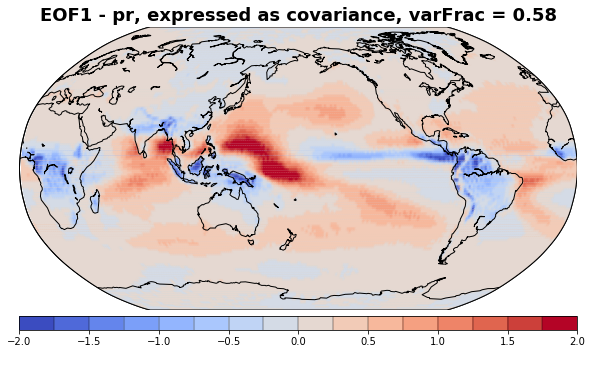

In [88]:
data = eof*(-1)
eof_nb = 1
title = "EOF1 - "+str(variables[0])+", expressed as covariance, varFrac = 0.58"
label_min = -2
label_max = 2
name_figure = "PPE2_EOF1map_"+str(variable)+".png"
eof_map_plot(data, eof_nb, title, label_min, label_max, name_figure)

In [89]:
EOF1_df = eof[0].to_dataframe().drop(labels = 'mode', axis=1)

# Save the numpy array in a file  
EOF1_df.to_pickle("/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap1_"+str(variable)+".npy")

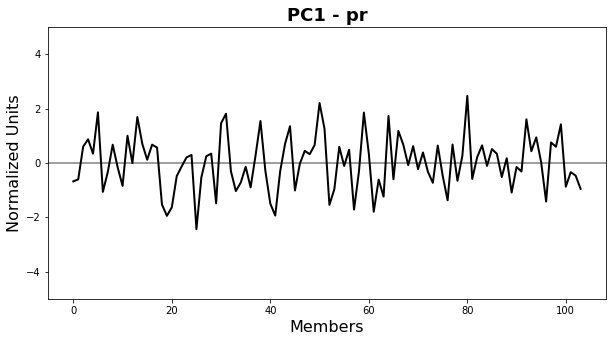

In [90]:
data = pc*(-1)
pc_nb = 1
ymin = -5
ymax = 5
title = "PC1 - "+str(variables[0])
name_figure = "PPE2_EOF1pc_"+str(variables[0])+".png"
pc_plot(data, pc_nb, ymin, ymax, title, name_figure)

In [91]:
pc1_official = pc[0, 0]
pc1_p1 = pc[1, 0]

pc1 = pc[2:, 0]

# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF1pc_'+str(variable)+'.npy', pc1_official)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF1pc_'+str(variable)+'.npy', pc1_p1)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF1pc_'+str(variable)+'.npy', pc1)

### EOF 2 : plotting LW

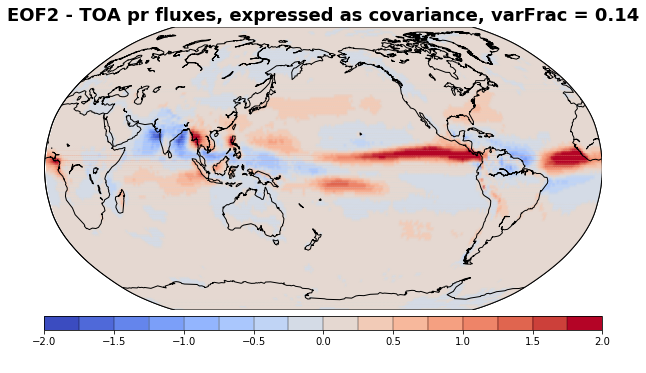

In [92]:
data = eof*(-1)
eof_nb = 2
title = "EOF2 - TOA "+str(variables[0])+" fluxes, expressed as covariance, varFrac = 0.14"
label_min = -2
label_max = 2
name_figure = 'PPE2_EOF2map_'+str(variable)+'.png'
eof_map_plot(data, eof_nb, title, label_min, label_max, name_figure)

In [93]:
EOF2_df = eof[1].to_dataframe().drop(labels = 'mode', axis=1)

# Save the numpy array in a file  
EOF2_df.to_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap2_'+str(variable)+'.npy')

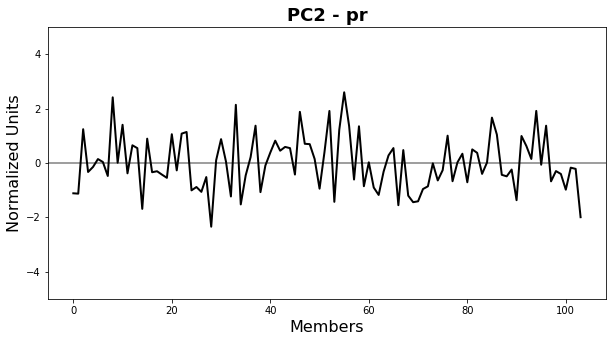

In [94]:
data = pc*(-1)
pc_nb = 2
ymin = -5
ymax = 5
title = 'PC2 - '+str(variable)
name_figure = 'PPE2_EOF2pc_'+str(variable)+'.png'
pc_plot(data, pc_nb, ymin, ymax, title, name_figure)

In [95]:
pc2_official = pc[0,1]
pc2_p1 = pc[1,1]
pc2 = pc[2:, 1]

# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF2pc_'+str(variable)+'.npy', pc2_official)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF2pc_'+str(variable)+'.npy', pc2_p1)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF2pc_'+str(variable)+'.npy', pc2)

### EOF 3 : plotting LW

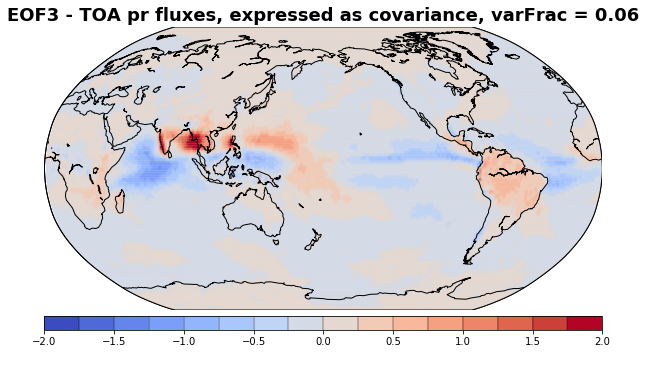

In [96]:
data = eof*(-1)
eof_nb = 3
title = 'EOF3 - TOA '+str(variable)+' fluxes, expressed as covariance, varFrac = 0.06'
label_min = -2
label_max = 2
name_figure = 'PPE2_EOF3map_'+str(variable)+'.png'
eof_map_plot(data, eof_nb, title, label_min, label_max, name_figure)

In [97]:
EOF3_df = eof[2].to_dataframe().drop(labels = 'mode', axis=1)

# Save the numpy array in a file  
EOF3_df.to_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap3_'+str(variable)+'.npy')

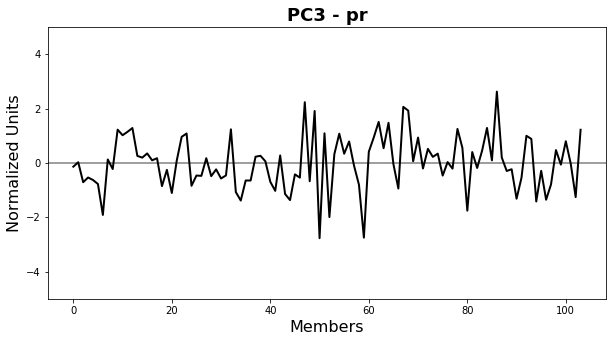

In [98]:
data = pc*(-1)
pc_nb = 3
ymin = -5
ymax = 5
title = 'PC3 - '+str(variable)
name_figure = 'PPE2_EOF3pc_'+str(variable)+'.png'
pc_plot(data, pc_nb, ymin, ymax, title, name_figure)

In [99]:
pc3_official = pc[0,2]
pc3_p1 = pc[1,2]
pc3 = pc[2:, 2]

# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF3pc_'+str(variable)+'.npy', pc3_official)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF3pc_'+str(variable)+'.npy', pc3_p1)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF3pc_'+str(variable)+'.npy', pc3)

### EOF 4 : plotting LW

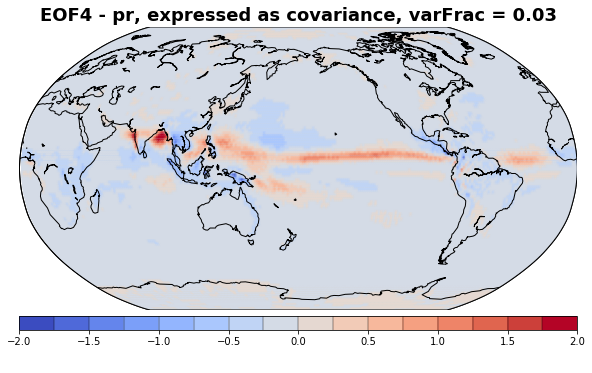

In [100]:
data = eof
eof_nb = 4
title = 'EOF4 - '+str(variable)+', expressed as covariance, varFrac = 0.03'
label_min = -2
label_max = 2
name_figure = 'PPE2_EOF4map_'+str(variable)+'.png'
eof_map_plot(data, eof_nb, title, label_min, label_max, name_figure)

In [101]:
EOF4_df = eof[3].to_dataframe().drop(labels = 'mode', axis=1)

# Save the numpy array in a file  
EOF4_df.to_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap4_'+str(variable)+'.npy')

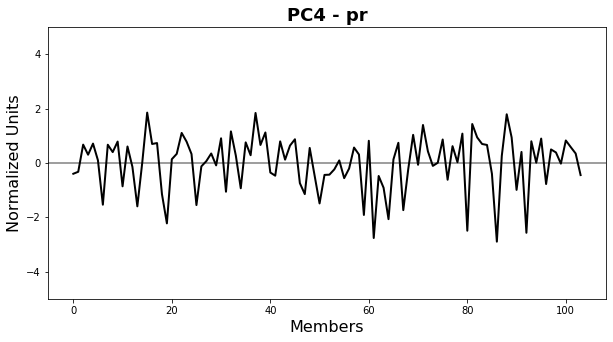

In [102]:
data = pc
pc_nb = 4
ymin = -5
ymax = 5
title = 'PC4 - '+str(variable)
name_figure = 'PPE2_EOF4pc_'+str(variable)+'.png'
pc_plot(data, pc_nb, ymin, ymax, title, name_figure)

In [103]:
pc4_official = pc[0, 3]
pc4_p1 = pc[1, 3]
pc4 = pc[2:, 3]

# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF4pc_'+str(variable)+'.npy', pc4_official)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF4pc_'+str(variable)+'.npy', pc4_p1)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF4pc_'+str(variable)+'.npy', pc4)

### EOF 5 : plotting tas

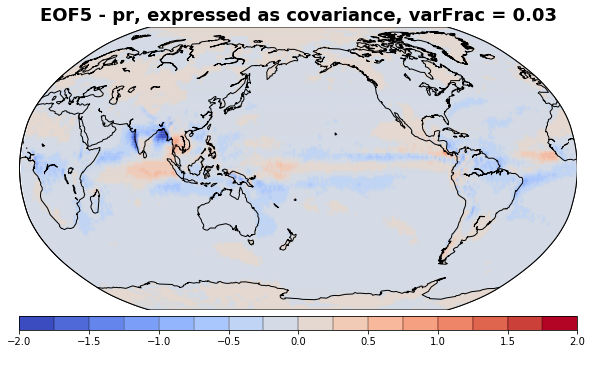

In [104]:
data = eof
eof_nb = 5
title = 'EOF5 - '+str(variable)+', expressed as covariance, varFrac = 0.03'
label_min = -2
label_max = 2
name_figure = 'PPE2_EOF5map_'+str(variable)+'.png'
eof_map_plot(data, eof_nb, title, label_min, label_max, name_figure)

In [105]:
EOF5_df = eof[4].to_dataframe().drop(labels = 'mode', axis=1)

# Save the numpy array in a file  
EOF5_df.to_pickle('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOFmap5_'+str(variable)+'.npy')

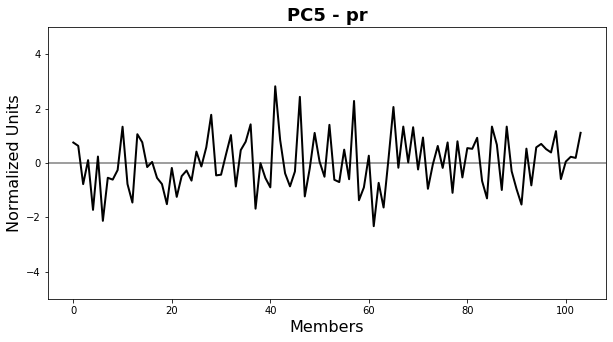

In [106]:
data = pc
pc_nb = 5
ymin = -5
ymax = 5
title = 'PC5 - '+str(variable)
name_figure = 'PPE2_EOF5pc_'+str(variable)+'.png'
pc_plot(data, pc_nb, ymin, ymax, title, name_figure)

In [107]:
pc5_official = pc[0, 4]
pc5_p1 = pc[1, 4]
pc5 = pc[2:, 4]

# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/official_EOF5pc_'+str(variable)+'.npy', pc5_official)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/p1_EOF5pc_'+str(variable)+'.npy', pc5_p1)
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_EOF5pc_'+str(variable)+'.npy', pc5)

In [108]:
## varFrac

# Save the numpy array in a file   
np.save('/data/home/globc/peatier/CNRMppe/PPE/ENSEMBLE2/files/npy/PPE2_varFrac_'+str(variable)+'.npy', varFrac)

## Test de reconstruction des données d'origine :

In [109]:
pc_test1 = pc[:, 0]
pc_test1

<xarray.DataArray 'pcs' (time: 104)>
array([ 0.68020242,  0.60460614, -0.5989046 , -0.86825354, -0.33923875,
       -1.86107742,  1.06601833,  0.33635423, -0.67015755,  0.15801656,
        0.84603078, -0.99818027,  0.00934473, -1.68745478, -0.70540604,
       -0.11760273, -0.67081708, -0.56416909,  1.53177934,  1.94723475,
        1.63462608,  0.48736276,  0.129837  , -0.20454238, -0.29216575,
        2.43804064,  0.53242869, -0.24444729, -0.34043859,  1.48779178,
       -1.45593838, -1.8097769 ,  0.30497269,  1.03761171,  0.72272138,
        0.14182325,  0.9030447 , -0.2691418 , -1.54149565,  0.29679501,
        1.49902439,  1.93660768,  0.30942917, -0.70581899, -1.35135988,
        1.01338373,  0.02959434, -0.44489861, -0.31954693, -0.65818562,
       -2.20120315, -1.26206287,  1.5436676 ,  0.96701206, -0.59219078,
        0.1130382 , -0.48435762,  1.71779997,  0.31180646, -1.85241574,
       -0.34578101,  1.79600648,  0.61245907,  1.24076809, -1.72729614,
        0.60317379, -1.17819484, -0.66920445,  0.08170618, -0.61621142,
        0.22889938, -0.38408399,  0.32673613,  0.73265579, -0.63820092,
        0.46987379,  1.37560621, -0.67467186,  0.65835921, -0.26759438,
       -2.46467009,  0.58864316, -0.20840403, -0.64615608,  0.10994725,
       -0.50735589, -0.33635698,  0.51887244, -0.1735966 ,  1.09108217,
        0.15119665,  0.3182508 , -1.60358529, -0.43025382, -0.93945487,
       -0.01480264,  1.42135814, -0.75268354, -0.59346294, -1.41910887,
        0.87563572,  0.34067882,  0.46796065,  0.95450294])
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 ... 95 96 97 98 99 100 101 102 103
    mode     int64 0

In [110]:
Recon_data = eof[0]*pc[:, 0]+eof[1]*pc[:, 1]+eof[2]*pc[:, 2]+eof[3]*pc[:, 3]+eof[4]*pc[:, 4]
Recon_data = Recon_data + mean
Recon_data

<xarray.DataArray (lat: 128, lon: 256, time: 104)>
dask.array<add, shape=(128, 256, 104), dtype=float64, chunksize=(128, 256, 104), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9 ... 95 96 97 98 99 100 101 102 103
    mode     int64 4
    height   float64 2.0

In [111]:
Recon_data_global = Recon_data.mean(dim=['lat','lon'])#.drop(dim='time')
#Recon_data_global
matrix_global = matrix.mean(dim=['lat','lon'])#.drop(dim='time')
#matrix_global

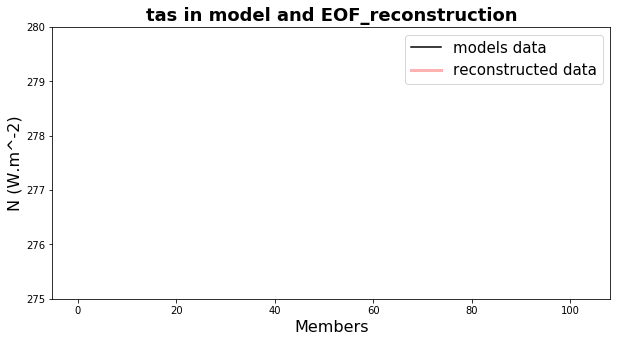

In [112]:
# SETTINGS
ymin = 275
ymax = 280
y_label = 'N (W.m^-2)'
title = 'tas in model and EOF_reconstruction'
legend = ['models data','reconstructed data']


# PLOT  
plt.figure(figsize=(10, 5))
    
ax = plt.gca()
matrix_global.plot(color='black', linewidth=1.5, ax=ax)
Recon_data_global.plot(color='red', alpha=0.3, linewidth=3, ax=ax)

ax.axhline(0, color='k', alpha=0.5)
ax.set_ylim(ymin, ymax)
ax.set_xlabel('Members', size = 16)
ax.set_ylabel(y_label, size = 16)
ax.set_title(title, fontsize=18, 
             fontweight = 'bold')
plt.legend(legend, fontsize=15)

# Enregistrer la figure .....................

#plt.savefig("/data/home/globc/peatier/figures/"+name_figure, 
#    orientation='portrait', bbox_inches='tight', pad_inches=0.1)

# Show la figure .................
plt.show()